In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Importing libraries
from tropical.discretize_path import DomPath
from tropical.sequence_analysis import Sequences
from tropical.visualize_discretization import visualization_seq_paths, visualization_path
from pysb.simulator import ScipyOdeSimulator
import numpy as np
from mm_two_paths_model import model

### Load the calibrated parameters and simulate the model with those simulations

In [3]:
pars = np.load('calibrated_pars.npy')
tspan = np.linspace(0, 100, 101)
sim = ScipyOdeSimulator(model, tspan=tspan).run(param_values=pars[:100], num_processors=4)

In [4]:
# sim.save('sims_100.h5')

In [5]:
dp = DomPath(model=model, simulations=sim, type_analysis='production', dom_om=1, target='s5', depth=2)
signs, paths = dp.get_path_signatures(cpu_cores=1, verbose=True)

In [6]:
signs.sequences.head()

,,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0
seq_idx,count,,,,,,,,,,,,,,,,,,,,,
0,1,2,2,2,2,2,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
1,1,2,2,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1
2,1,2,2,2,2,2,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
3,1,2,2,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1
4,1,2,2,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1


In [7]:
signs.dissimilarity_matrix(n_jobs=4)
signs.silhouette_score_agglomerative_range(4)

,num_clusters,cluster_silhouette
0,2,0.995133
1,3,0.973921
2,4,0.975000


In [8]:
signs.agglomerative_clustering(2)

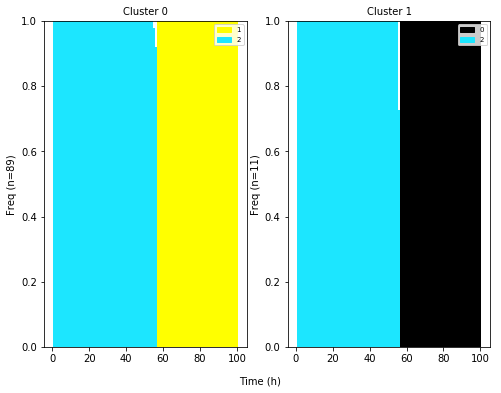

In [9]:
signs.plot_sequences()

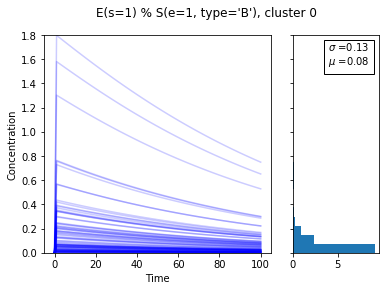

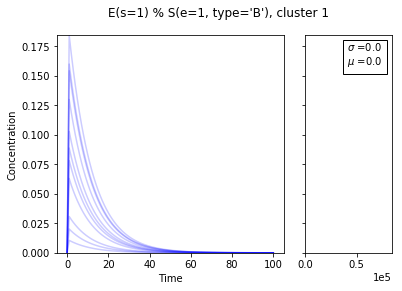

In [10]:
%matplotlib inline
from tropical.visualize_trajectories import VisualizeTrajectories

clusters = signs.labels
ac = VisualizeTrajectories(model=model, sim_results=sim, clusters=clusters)
ac.plot_cluster_dynamics(species=[4], norm=False)

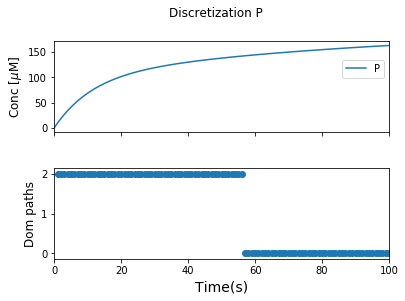

In [24]:
visualization_seq_paths(sim, 0, signs)